# 國家安全分析-利用Kmeans分群

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
data=pd.read_csv('/Users/shixiongyuan/Downloads/Country Risk 2019.csv')

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth
0,Albania,AL,35,1.821,4.546,2.983
1,Algeria,DZ,35,2.219,4.435,2.553
2,Argentina,AR,45,1.989,5.087,-3.061
3,Armenia,AM,42,2.294,4.812,6.000
4,Australia,AU,77,1.419,8.363,1.713
...,...,...,...,...,...,...
117,Venezuela,VE,16,2.671,2.895,-35.000
118,Vietnam,VI,37,1.877,5.084,6.500
119,Yemen,YE,15,3.369,2.671,2.113
120,Zambia,ZM,34,1.805,4.592,2.021


# What do we have?


In [40]:
data.head()

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth
0,Albania,AL,35,1.821,4.546,2.983
1,Algeria,DZ,35,2.219,4.435,2.553
2,Argentina,AR,45,1.989,5.087,-3.061
3,Armenia,AM,42,2.294,4.812,6.000
4,Australia,AU,77,1.419,8.363,1.713


### 在整個數據集中，我們有
* GDP成長率
* 和平程度
* 非法程度
* 腐敗程度

# Data in data
* 了解有什麼數據後，我們來查看數據的分佈和相關性，還有清理數據

In [4]:
data.describe()

,Corruption,Peace,Legal,GDP Growth
count,122.000000,122.000000,122.000000,122.000000
mean,46.590164,2.006508,5.729107,2.348861
std,18.833219,0.463560,1.392486,4.259358
min,15.000000,1.072000,2.671000,-35.000000
25%,32.250000,1.700750,4.726500,1.245250
50%,41.000000,1.945000,5.430000,2.597500
75%,59.750000,2.298500,6.481000,3.998750
max,87.000000,3.369000,8.712000,7.800000


<AxesSubplot:>

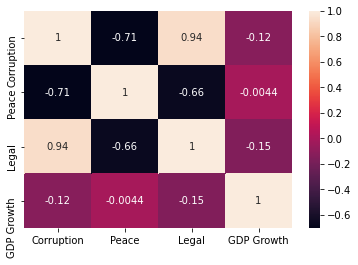

In [20]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

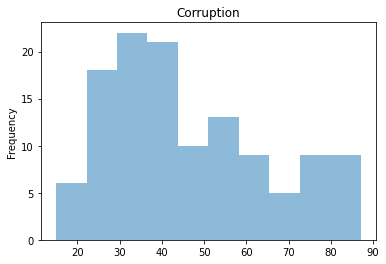

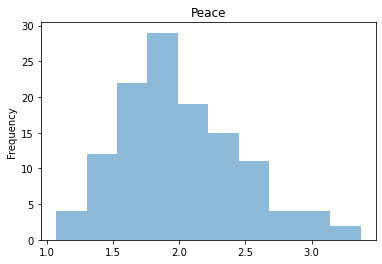

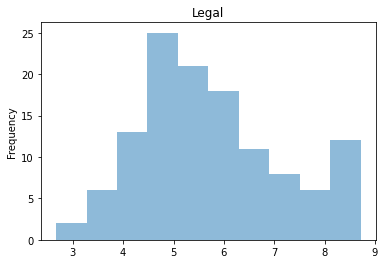

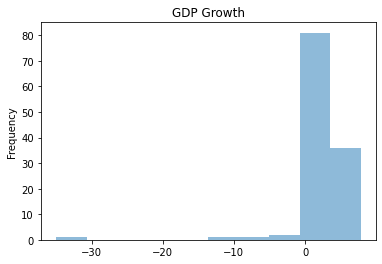

In [5]:
# plot histograms
plt.figure(1)
data['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2)
data['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3)
data['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4)
data['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

# Data inference
* Legal和Corruption相關性極高，下面我們試著Corruption去除，因為怕這項特徵對於整個影響太大
* 在GDP Growth有個非常明顯的離群值，下面我們會把它給去除

In [6]:
#有一個很明顯地離群值
data[data['GDP Growth'] < -20]
data=data.drop(117)

In [7]:
Features = data[['Peace', 'Legal', 'GDP Growth']]

# Normalization(標準化)

In [8]:
Features = (Features - Features.mean()) / Features.std()
Features.head()

,Peace,Legal,GDP Growth
0,-0.390081,-0.878158,0.126952
1,0.472352,-0.958948,-0.040772
2,-0.026039,-0.484397,-2.230541
3,0.634871,-0.684553,1.303747
4,-1.261182,1.900001,-0.368418


# Elbow method

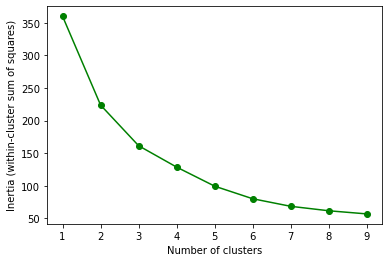

In [9]:
Ks = range(1, 10)
inertia = [KMeans(i).fit(Features).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia,'go-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

* 這裡我們根據https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set 裡面的肘部法
* 在k=3和k=4時，Inertia明顯下降趨緩，故我們選取k=3作為這次我們分類的數量
* 此法“肘部”不能總是被明確地識別，使得這種方法較為主觀，下面我會使用其他方法。

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Features)

# print inertia & cluster center
print("K=3時，群內平方和：", kmeans.inertia_)
print("各群中心點：", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("各國分類: ", y)

K=3時，群內平方和： 161.2553773419662
各群中心點： [[ 1.21777164 -0.67632275 -0.90441375]
 [ 0.15270973 -0.60009398  0.70424093]
 [-0.85097477  1.02149992 -0.23897931]]
各國分類:  [1 1 0 1 2 2 0 0 1 2 1 1 1 2 0 1 0 1 2 0 2 1 0 2 1 2 2 0 2 1 0 1 1 2 1 2 2
 1 1 2 1 1 1 1 2 2 1 1 0 2 0 2 2 2 2 1 1 2 2 2 0 0 2 1 1 2 1 1 2 0 1 1 1 1
 1 2 2 0 0 2 2 0 1 0 1 1 2 2 2 2 0 1 0 1 1 1 2 2 2 0 2 1 2 2 2 1 1 1 0 1 0
 1 0 2 2 2 2 1 0 1 0]


# Data Visualization

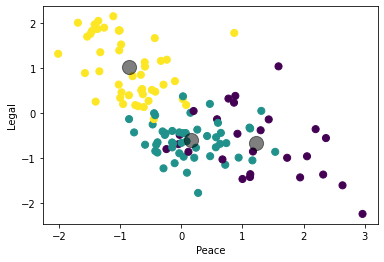

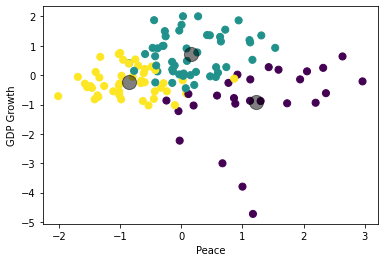

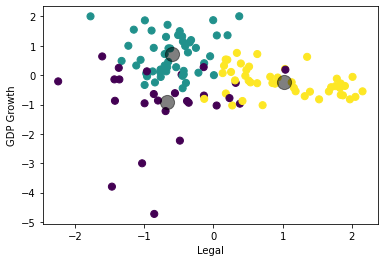

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
norm=clrs.Normalize()
cmap=cm.viridis
figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(Features.iloc[:,figs[i][0]], Features.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

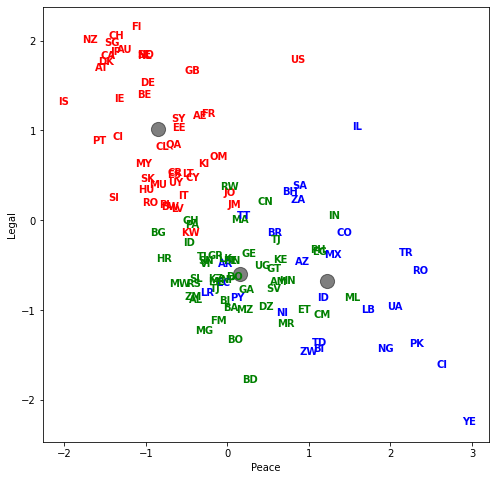

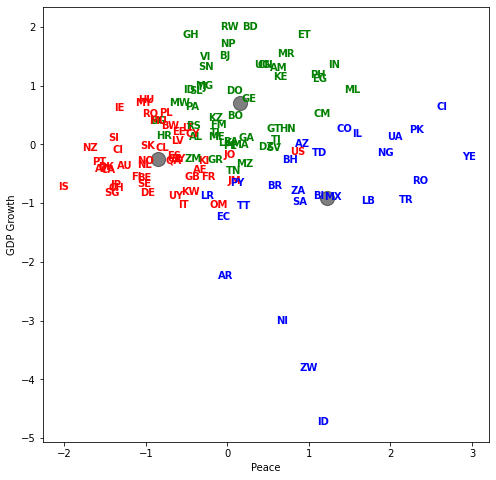

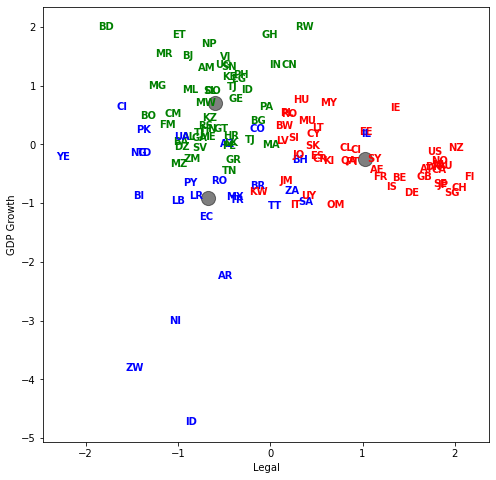

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(Features.iloc[:, x_1], Features.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(Features.shape[0]):
        plt.text(Features.iloc[j, x_1], Features.iloc[j, x_2], data['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

In [14]:
result = pd.DataFrame({'Country':data['Country'], 'Abbrev':data['Abbrev'], 'Label':y})
result.sort_values('Label')

,Country,Abbrev,Label
0,Albania,AL,0
31,Egypt,EG,0
63,Madagascar,MG,0
34,Ethiopia,ET,0
37,Gabon,GA,0
...,...,...,...
81,Pakistan,PK,2
83,Paraguay,PY,2
90,Russia,RO,2
99,South Africa,ZA,2


# Silhouette method
* Silhouette是指一種解釋和驗證數據集群內一致性的方法。該技術提供了每個對象分類情況的簡潔圖形表示。
* 範圍從 -1 到 +1，其中高值表示對象與其自己的集群匹配良好，而與相鄰集群匹配不佳。
* 如果大多數對象具有較高的值，則集群配置是合適的。如果許多點具有低值或負值，則聚類配置可能具有過多或過少的聚類。


In [15]:
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels=clusterer.fit_predict(Features)
    silhouette_avg=silhouette_score(Features,cluster_labels)
    print("For n_clusters=", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters= 2 The average silhouette_score is : 0.3509139523852161
For n_clusters= 3 The average silhouette_score is : 0.3497128439442145
For n_clusters= 4 The average silhouette_score is : 0.3569777762655576
For n_clusters= 5 The average silhouette_score is : 0.34554912965747436
For n_clusters= 6 The average silhouette_score is : 0.348753821229846
For n_clusters= 7 The average silhouette_score is : 0.3536063373007038
For n_clusters= 8 The average silhouette_score is : 0.35186583562825285
For n_clusters= 9 The average silhouette_score is : 0.3464315091042409
For n_clusters= 10 The average silhouette_score is : 0.3255151056069412


# Inference
* K=3時，得到了最高的分數，但差距都沒有非常的明顯。
* 這只是最開頭的分類，若想應用到現實上，還要考慮很多層面的問題，但這種非監督式學習確實可以在商業上發揮非常大的作用。